###  Practical 5
#### Name: Janhavi Kulkarni
#### Roll No.: B-11
#### Aim: Loan default is a significant risk for banks and financial institutions, impacting their profitability and stability. Accurately predicting loan defaults can help banks in their risk assessment processes. Develop machine learning model to predict whether an individual will default on a bank loan based on their financial and demographic data using ensemble learning technique.
##### Perform the EDA
##### Apply Random Forest algorithm
##### Apply Adaboost algorithm
##### Evaluate the performance using Precision, Recall, F1 score and accuracy.
##### Develop a model using artificial neural network which can predict whether person will default to bank or not.
##### Apply hyper parameter tuning to improve performance.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('bank.csv')

## Basic EDA

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0
11161,34,9,1,1,0,0,0,0,0,9,5,628,1,-1,0,3,0


In [7]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## Advance EDA

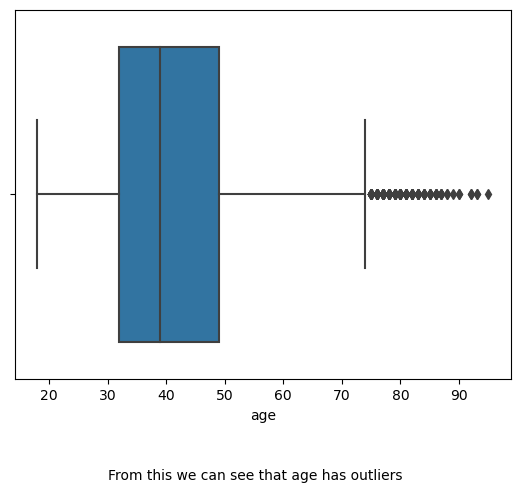

In [15]:
sns.boxplot(x='age', data=df)
plt.figtext(0.5, -0.1, "From this we can see that age has outliers", ha="center")

plt.show()

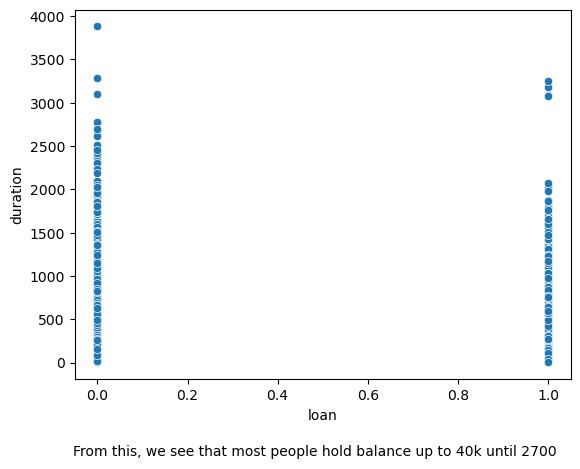

In [18]:
sns.scatterplot(x='loan', y='duration', data=df)
plt.figtext(0.5, -0.05, "From this, we see that most people hold balance up to 40k until 2700", ha="center")
plt.show()

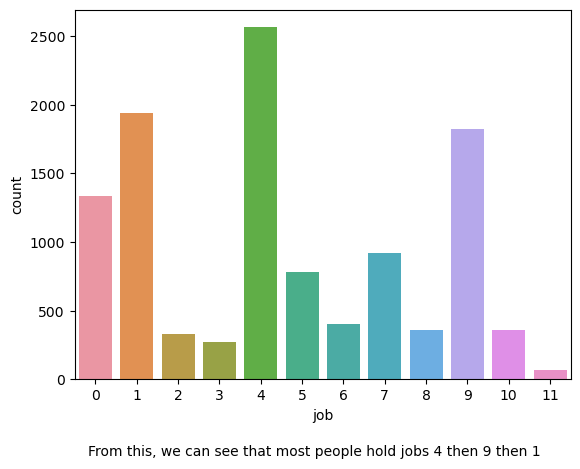

In [20]:
sns.countplot(x = 'job', data = df)
plt.figtext(0.5, -0.05, "From this, we can see that most people hold jobs 4 then 9 then 1", ha="center")
plt.show()

In [25]:
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


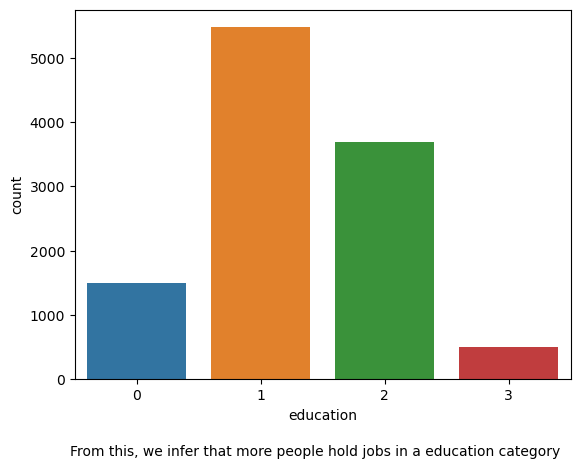

In [27]:
sns.countplot(x='education', data=df)
plt.figtext(0.5, -0.05, "From this, we infer that more people hold jobs in a education category", ha="center")
plt.show()

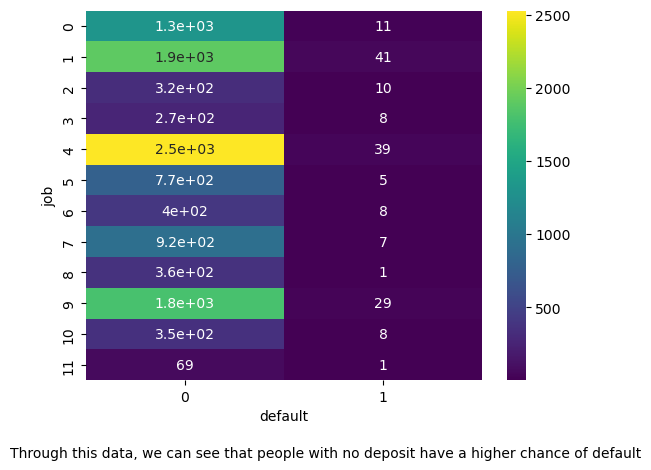

In [28]:
sns.heatmap(pd.crosstab(df['job'], df['default']), annot=True, cmap='viridis')
plt.figtext(0.5, -0.05, 'Through this data, we can see that people with no deposit have a higher chance of default', ha="center")
plt.show()

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object


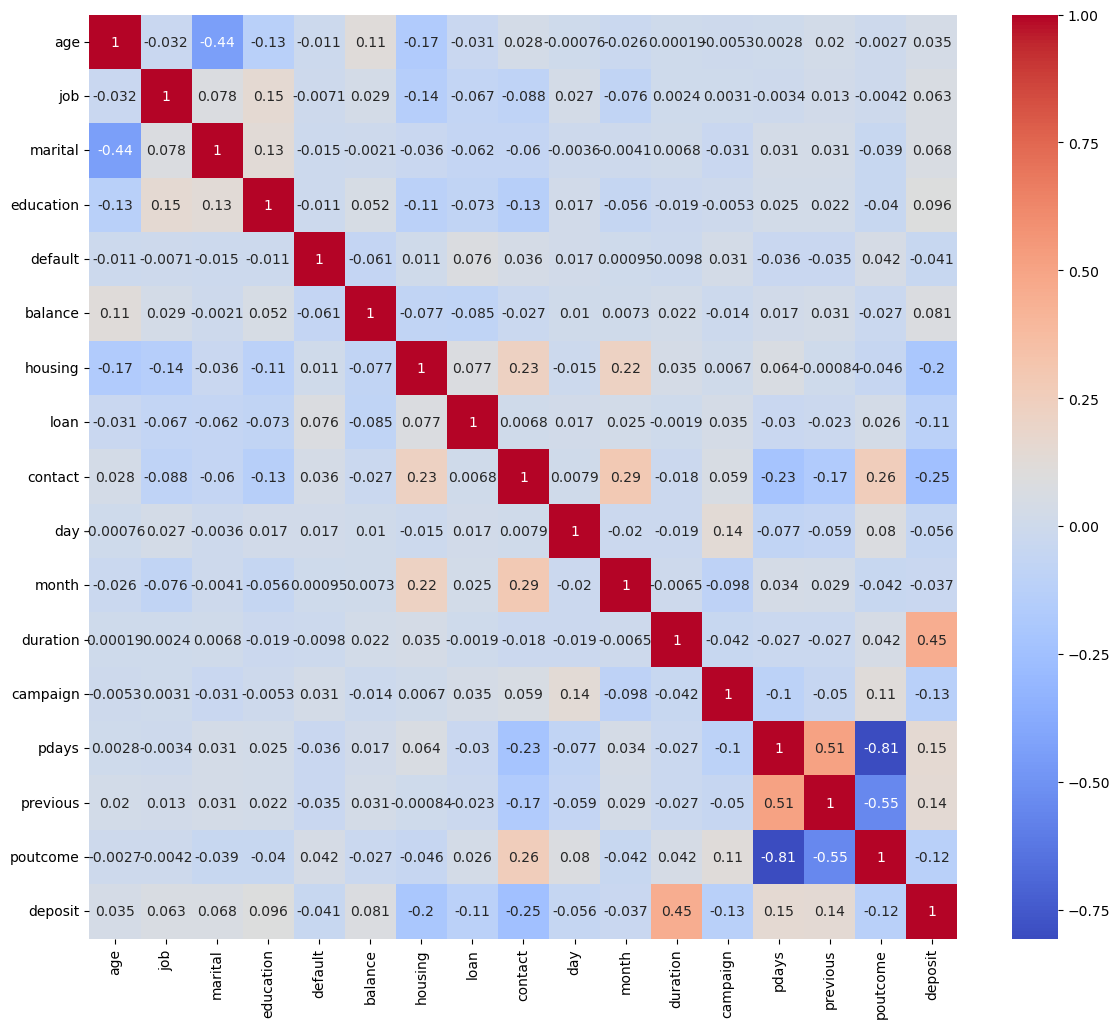

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(df.dtypes)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.show()

## Handling Outlier

In [35]:
import pandas as pd
percentile25 = df['age'].quantile(0.25)  # 25th percentile
percentile75 = df['age'].quantile(0.75)  # 75th percentile
iqr = percentile75 - percentile25          # Interquartile range
upper_limit = percentile75 + 1.5 * iqr     # Upper limit for outliers
lower_limit = percentile25 - 1.5 * iqr     # Lower limit for outliers
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)


Lower Limit: 6.5
Upper Limit: 74.5


In [36]:
# Identify outliers
outliers = df[(df['age'] < lower_limit) | (df['age'] > upper_limit)]
print("Outliers in the 'age' column:")
print(outliers)

Outliers in the 'age' column:
       age  job  marital  education  default  balance  housing  loan  contact  \
1162    75    5        0          0        0     3881        1     0        0   
1236    85    5        1          0        0    12114        0     0        1   
1243    90    5        0          1        0        1        0     0        0   
1274    85    5        0          0        0     7613        0     0        0   
1320    83    5        0          0        0     1097        0     0        1   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
10438   77    5        1          0        0     1492        0     0        1   
10562   88    5        1          0        0      648        0     0        1   
10570   77   11        1          3        0      397        0     0        1   
10618   78    5        1          0        0      680        0     0        1   
10843   86    5        0          3        0      157        0     0        1  

In [37]:
df = df[df['age'] < upper_limit]

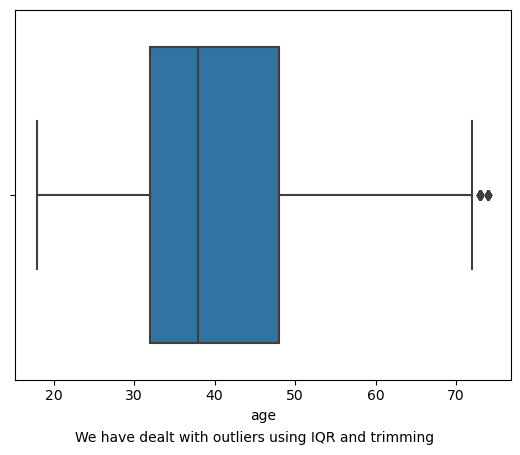

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the 'age' column
sns.boxplot(x=df['age'])

# Add descriptive text below the plot
plt.figtext(0.5, -0.02, 'We have dealt with outliers using IQR and trimming', ha="center")

# Display the plot
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = df.drop(['default'], axis=1)  # Features
y = df['default']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8792, 16)
X_test shape: (2199, 16)
y_train shape: (8792,)
y_test shape: (2199,)


## Random Forest Algorithm

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Load the dataset (replace with the correct path)
df = pd.read_csv('bank.csv')

# Print column names to identify the target variable
print(df.columns)

# Define features and target (update 'y' to the actual target variable name)
X = df.drop('deposit', axis=1)  # Adjust this line based on the actual target column name
y = df['deposit']  # Adjust this line based on the actual target column name

# Select categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Create the ColumnTransformer to apply OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ],
    remainder='passthrough'  # Keep the rest of the columns unchanged
)

# Apply the transformations to the features
X_transformed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')
Precision: 0.8094390026714159
Recall: 0.851921274601687
F1 Score: 0.8301369863013699
Accuracy: 0.8334079713390058


Precision: 0.8094390026714159
Recall: 0.851921274601687
F1 Score: 0.8301369863013699
Accuracy: 0.8334079713390058


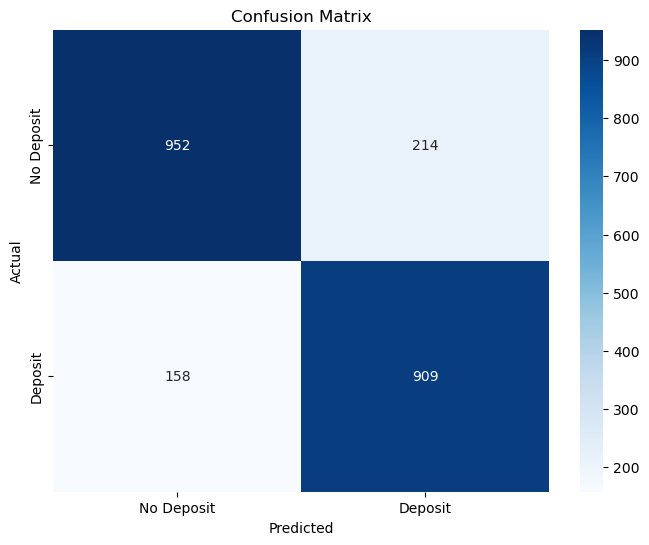

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace with the correct path)
df = pd.read_csv('bank.csv')

# Define features and target (update 'deposit' to the actual target variable name)
X = df.drop('deposit', axis=1)  # Features
y = df['deposit']  # Target variable

# Select categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Create the ColumnTransformer to apply OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ],
    remainder='passthrough'  # Keep the rest of the columns unchanged
)

# Apply the transformations to the features
X_transformed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)
f1 = f1_score(y_test, rf_predictions)
accuracy = accuracy_score(y_test, rf_predictions)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Deposit', 'Deposit'], yticklabels=['No Deposit', 'Deposit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, rf_predictions)
print(accuracy)

0.8334079713390058


## Adaboost Algorithm

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Predict
ada_predictions = ada_model.predict(X_test)

# Evaluate
ada_accuracy = accuracy_score(y_test, ada_predictions)
ada_precision = precision_score(y_test, ada_predictions, pos_label=1)  # Adjusted to pos_label=1
ada_recall = recall_score(y_test, ada_predictions, pos_label=1)
ada_f1 = f1_score(y_test, ada_predictions, pos_label=1)

# Print results
print(f"AdaBoost - Accuracy: {ada_accuracy:.4f}, Precision: {ada_precision:.4f}, Recall: {ada_recall:.4f}, F1 Score: {ada_f1:.4f}")

AdaBoost - Accuracy: 0.8115, Precision: 0.8088, Recall: 0.7929, F1 Score: 0.8008


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ada_predictions)

array([[966, 200],
       [221, 846]], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, ada_predictions)
print (accuracy)

0.8114643976712942


## ANN

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset (replace with the correct path)
df = pd.read_csv('bank.csv')

# Define features and target
X = df.drop('deposit', axis=1)  # Features
y = df['deposit']  # Target variable

# Select categorical columns for one-hot encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome']

# Apply OneHotEncoder to the categorical columns
onehot = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_columns)], remainder='passthrough')

# Transform the features
X = onehot.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(units=16, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(units=8, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model on the test set
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
print(f"ANN Model - Accuracy: {ann_accuracy}")

# Make predictions and convert probabilities to binary (0/1)
ann_predictions = (ann_model.predict(X_test) > 0.5).astype("int32")

# Calculate precision, recall, F1 score
ann_precision = precision_score(y_test, ann_predictions)
ann_recall = recall_score(y_test, ann_predictions)
ann_f1 = f1_score(y_test, ann_predictions)

print(f"ANN Model - Precision: {ann_precision}, Recall: {ann_recall}, F1 Score: {ann_f1}")


Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6426 - loss: 0.6235
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8336 - loss: 0.3867
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8476 - loss: 0.3618
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8563 - loss: 0.3465
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8693 - loss: 0.3260
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8622 - loss: 0.3333
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8640 - loss: 0.3265
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8676 - loss: 0.3134
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8707 - loss: 0.3151
Epoch 10/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8748 - loss: 0.3005
Epoch 11/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8774 - loss: 0.2956
Epoch 12/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/st

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ann_predictions)

array([[956, 210],
       [164, 903]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, ann_predictions)
print (accuracy)

0.8325123152709359


## Apply K-Fold Cross Validation

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model_cv = RandomForestClassifier(random_state=42)

# Apply k-fold cross-validation
cv_scores = cross_val_score(rf_model_cv, X, y, cv=10, scoring='accuracy')

print(f"K-Fold Cross-Validation Accuracy: {cv_scores.mean()}")

K-Fold Cross-Validation Accuracy: 0.7978083095079948


## Hyper Parameter Tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv('bank.csv')

# Define features and target
X = df.drop('deposit', axis=1)  # Features
y = df['deposit']  # Target variable

# Select categorical columns for one-hot encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome']

# Apply OneHotEncoder to the categorical columns
onehot = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_columns)], remainder='passthrough')

# Transform the features
X = onehot.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional for Random Forest, but can help in general)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")